In [10]:
################################################################################
# perform non-supervised hierarchical clustering for antidepressants present in LINCS data using
# their structural (Tanimoto) and functional (Jaccard) similarity profiles

# author: Ximena Fernandez
# mail:   xfdzciencias@gmail.com

################################################################################

In [11]:
################################################################################
# import modules 
################################################################################

import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
################################################################################
# data extraction
################################################################################

## read similarity matrices
df_tan = pd.read_csv("tanimoto_matrix.csv", index_col=0)
df_top_jac = pd.read_csv("jaccard_top_matrix.csv", index_col=0)
df_bottom_jac = pd.read_csv("jaccard_bottom_matrix.csv", index_col=0)
df_eff_jac = pd.read_csv("jaccard_effects_matrix.csv", index_col=0)

################################################################################
# data processing
################################################################################

## extract the names of the ads
antidepressants = df_tan.index
antidepressants_eff = df_eff_jac.index

## ensure all data is numeric
dfs = [df.iloc[:, :].apply(pd.to_numeric, errors='coerce') for df in [df_tan, df_top_jac, df_bottom_jac, df_eff_jac]]
df_tan, df_top_jac, df_bottom_jac, df_eff_jac = dfs

## convert matrices to numpy for non-supervised hierarchical clustering
tan, top_jac, bottom_jac, eff = [df.to_numpy() for df in dfs]

In [13]:
################################################################################
# non-supervised hierarchical clustering for structural similarity
################################################################################

## create the dissimilarity matrix based on the 'euclidean' distance metric
distance_matrix = sch.distance.pdist(tan, metric='euclidean')

## create a linkage matrix performing non-supervised hierarchical clustering using the 'complete' method
linkage_matrix = sch.linkage(distance_matrix, method='complete')

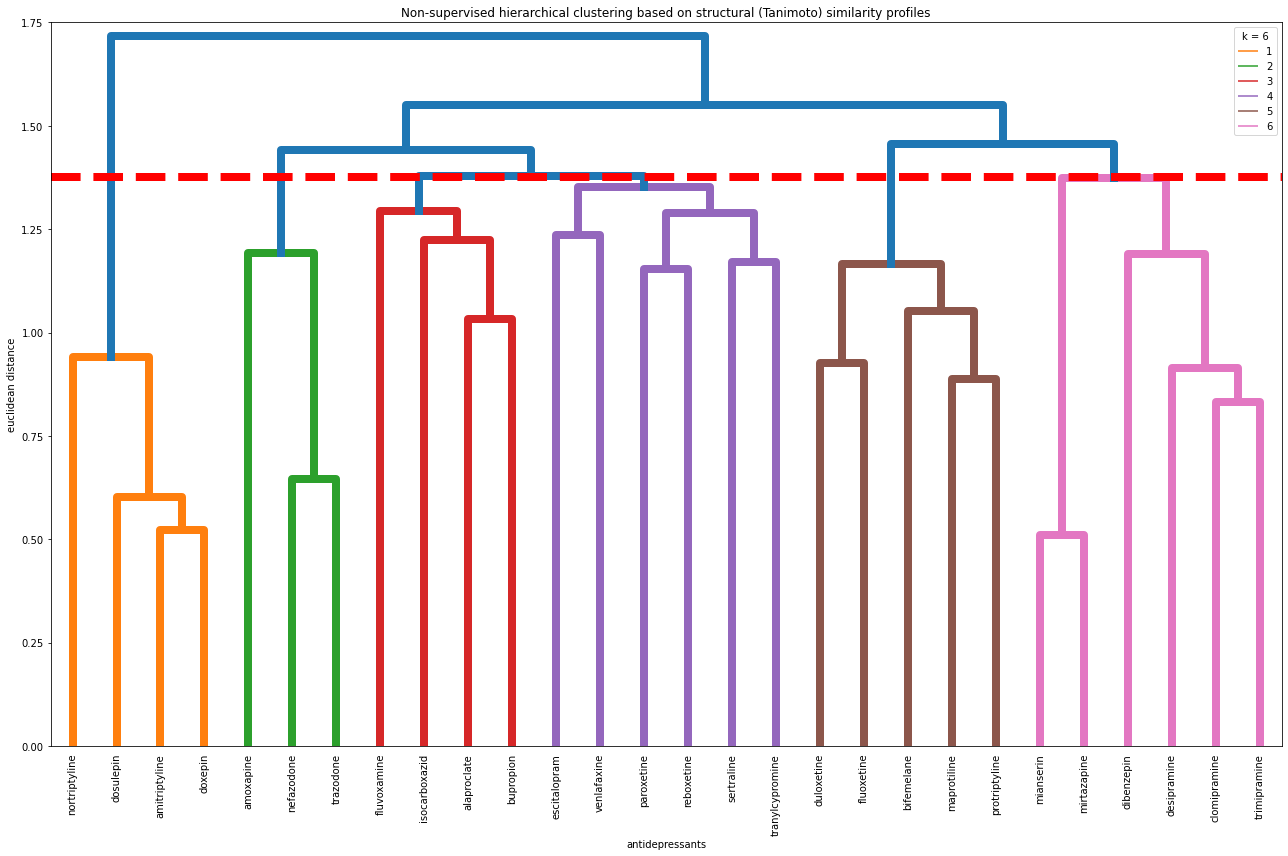

In [14]:
################################################################################
# data visualization for structural similarity
################################################################################

## create the dendrogram
plt.figure(figsize=(18, 12))
dendrogram = sch.dendrogram(linkage_matrix, labels=antidepressants, color_threshold=1.375)
for i, d in enumerate(dendrogram['dcoord']):
    x = dendrogram['icoord'][i]
    plt.plot(x, d, c=dendrogram['color_list'][i], linewidth=8)

plt.axhline(y=1.375, color='r', linestyle='--', label='cut-off threshold', linewidth=8)
plt.title('Non-supervised hierarchical clustering based on structural (Tanimoto) similarity profiles')
plt.xlabel('antidepressants')
plt.ylim(0, 1.75)
plt.yticks(np.arange(0, 2, 0.25))
plt.ylabel('euclidean distance')
plt.xticks(fontsize=10, rotation=90)
plt.legend(['1', '2', '3', '4', '5', '6'], title='k = 6', loc='upper right')

plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()

In [15]:
################################################################################
# non-supervised hierarchical clustering for top network functional perturbations similarity
################################################################################

## create the dissimilarity matrix based on the 'euclidean' distance metric
distance_matrix = sch.distance.pdist(top_jac, metric='euclidean')

## create a linkage matrix performing non-supervised hierarchical clustering using the 'complete' method
linkage_matrix = sch.linkage(distance_matrix, method='complete')

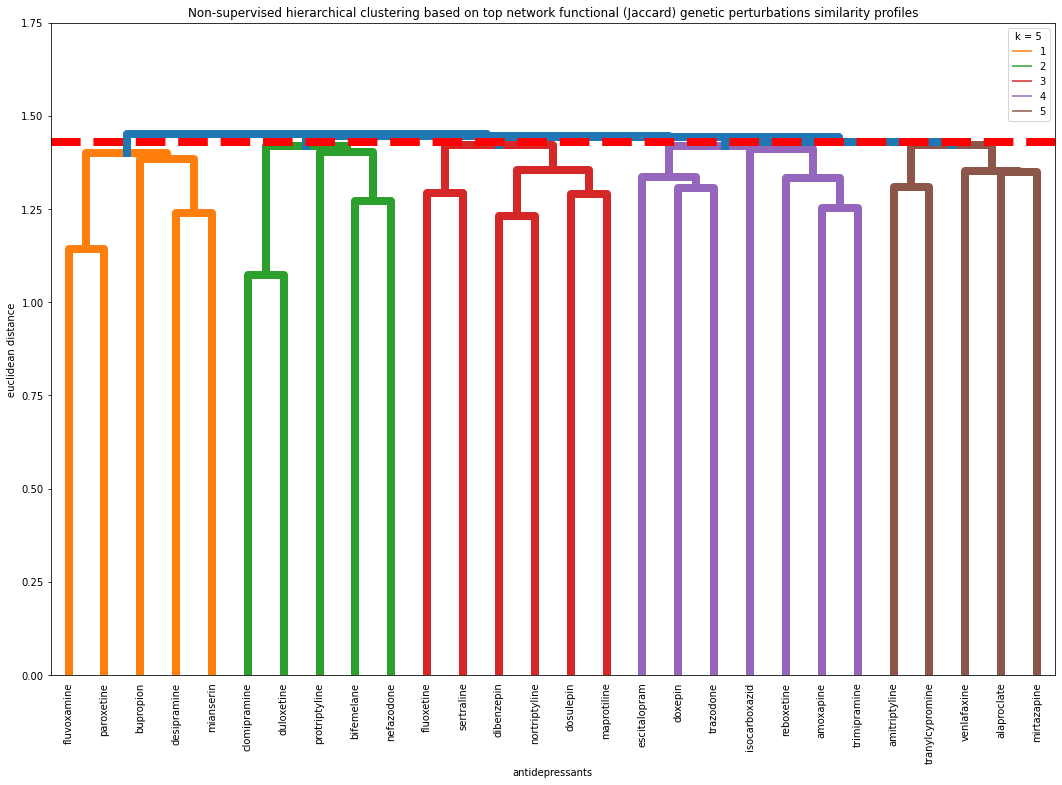

In [16]:
################################################################################
# data visualization for top network functional genetic perturbations similarity
################################################################################

## create the dendrogram
plt.figure(figsize=(18, 12))
dendrogram = sch.dendrogram(linkage_matrix, labels=antidepressants, color_threshold=1.429)
for i, d in enumerate(dendrogram['dcoord']):
    x = dendrogram['icoord'][i]
    plt.plot(x, d, c=dendrogram['color_list'][i], linewidth=8)

plt.axhline(y=1.429, color='r', linestyle='--', label='cut-off threshold', linewidth=8)
plt.title('Non-supervised hierarchical clustering based on top network functional (Jaccard) genetic perturbations similarity profiles')
plt.xlabel('antidepressants')
plt.ylim(0, 1.75)
plt.yticks(np.arange(0, 2, 0.25))
plt.ylabel('euclidean distance')
plt.xticks(fontsize=10, rotation=90)
plt.legend(['1', '2', '3', '4', '5'],  title='k = 5', loc='upper right')
plt.show()

In [17]:
################################################################################
# non-supervised hierarchical clustering for bottom network functional perturbations similarity
################################################################################

## create the dissimilarity matrix based on the 'euclidean' distance metric
distance_matrix = sch.distance.pdist(bottom_jac, metric='euclidean')

## create a linkage matrix performing non-supervised hierarchical clustering using the 'complete' method
linkage_matrix = sch.linkage(distance_matrix, method='complete')

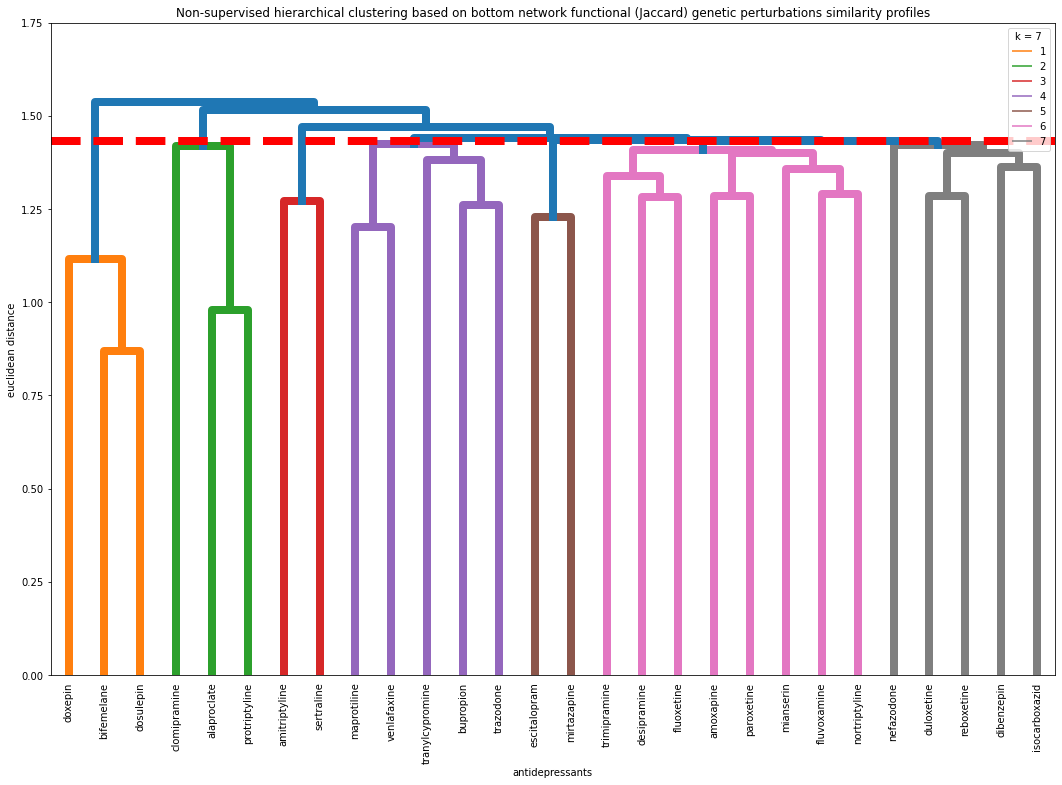

In [18]:
################################################################################
# data visualization for bottom network functional genetic perturbations similarity
################################################################################

## create the dendrogram
plt.figure(figsize=(18, 12))
dendrogram = sch.dendrogram(linkage_matrix, labels=antidepressants, color_threshold=1.432)
for i, d in enumerate(dendrogram['dcoord']):
    x = dendrogram['icoord'][i]
    plt.plot(x, d, c=dendrogram['color_list'][i], linewidth=8)

plt.axhline(y=1.432, color='r', linestyle='--', label='cut-off threshold', linewidth=8)
plt.title('Non-supervised hierarchical clustering based on bottom network functional (Jaccard) genetic perturbations similarity profiles')
plt.xlabel('antidepressants')
plt.ylim(0, 1.75)
plt.yticks(np.arange(0, 2, 0.25))
plt.ylabel('euclidean distance')
plt.xticks(fontsize=10, rotation=90)
plt.legend(['1', '2', '3', '4', '5', '6', '7'],  title='k = 7', loc='upper right')
plt.show()

In [19]:
################################################################################
# non-supervised hierarchical clustering for functional adverse effects similarity
################################################################################

## create the dissimilarity matrix based on the 'euclidean' distance metric
distance_matrix = sch.distance.pdist(eff, metric='euclidean')

## create a linkage matrix performing non-supervised hierarchical clustering using the 'complete' method
linkage_matrix = sch.linkage(distance_matrix, method='complete')

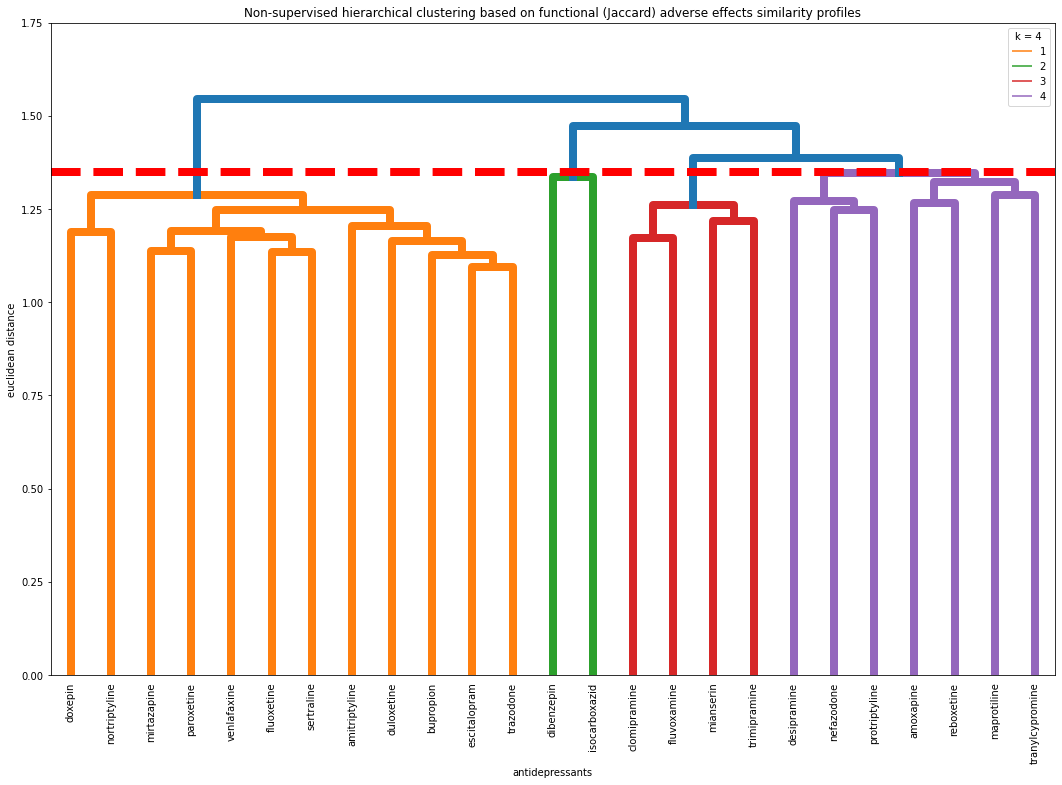

In [21]:
################################################################################
# data visualization for functional adverse effects similarity
################################################################################

## create the dendrogram
plt.figure(figsize=(18, 12))
dendrogram = sch.dendrogram(linkage_matrix, labels=antidepressants_eff, color_threshold=1.35)
for i, d in enumerate(dendrogram['dcoord']):
    x = dendrogram['icoord'][i]
    plt.plot(x, d, c=dendrogram['color_list'][i], linewidth=8)

plt.axhline(y=1.35, color='r', linestyle='--', label='cut-off threshold', linewidth=8)
plt.title('Non-supervised hierarchical clustering based on functional (Jaccard) adverse effects similarity profiles')
plt.xlabel('antidepressants')
plt.ylim(0, 1.75)
plt.yticks(np.arange(0, 2, 0.25))
plt.ylabel('euclidean distance')
plt.xticks(fontsize=10, rotation=90)
plt.legend(['1', '2', '3', '4'], title='k = 4', loc='upper right')
plt.show()